# Ford GoBike Data Investigation
## By Kaspar Lee

## Preliminary Wrangling

This investigation will take a deep look into data regarding trips make on Ford GoBikes (a bike sharing service) during 2017.

In [84]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [13]:
# Import data as Pandas DataFrame
df = pd.read_csv('2017-fordgobike-tripdata.csv')

### What is the structure of your dataset?

In [14]:
print(df.shape)
print(df.dtypes)

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


In [23]:
df.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

In [24]:
df.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [141]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [25]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


The dataset contains a total of 519,700 entries, i.e. data for that many individual trips made on a shared bicycle. There are 15 variables included for each trip:

- Longitude and latitude positions for the start and end points of the trip stored as floats
- Start and end times stored as objects (which will need to be converted to *datatime64* in order to analyse properly)
- Birth year, which can be used to calculate the age of the cyclist (as this dataset if for 2017 data only)
- Gender
- User Type (subscriber or customer)

### What is/are the main feature(s) of interest in your dataset?

Duration of the trips is significant, as are the characteristics of the cyclists, such as age, gender and whether they are a subscriber or customer. I am also interested in which stations/locations are are most common to start and finish at.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the start time and end time variables to be important, due to bike usage potentially peaking during commuting hours, and drop during the rest of the data. Additionally, birth year would be useful to compare whether younger or older people are more likely to cycle longer distances due to differing physical capabilities. Furthermore, there might be different characteristics between the rides of subscribers than customers, as subscribers are likely to have subscribed because they use the bikes often, potentially different to how regular customers use the bikes.

## Univariate Exploration

### Trip Duration

In [42]:
# Convert start_time and end_time variables to datetime64 data type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

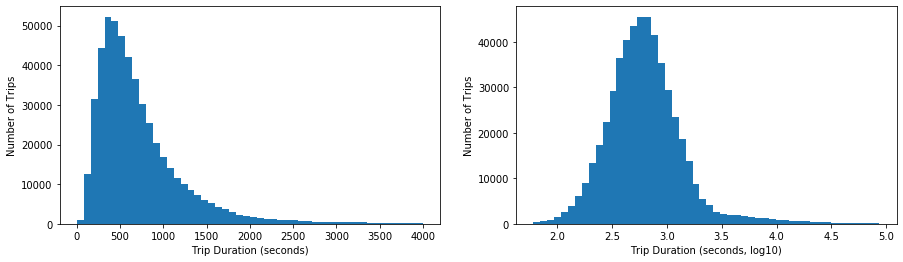

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figwidth(15)

ax1.hist(df.duration_sec, bins=50, range=(0, 4000))
ax1.set_xlabel('Trip Duration (seconds)')
ax1.set_ylabel('Number of Trips');

ax2.hist(np.log10(df.duration_sec), bins=50)
ax2.set_xlabel('Trip Duration (seconds, log10)')
ax2.set_ylabel('Number of Trips');

It appears the duration of trips follows a right skewed distribution, with the duration peaking around 500 seconds (8m 20s) and the vast majority falling under 2000 seconds (33m 20s). Plotting on a logarithmic scale (log10), the duration follows a normal distribution.

This indicates that most trips were likely made on shorter commutes, and not taken out for day trips or leisurely rides. It could be interesting to see if trip duration varies with whether the rider is a subscriber or not, as potentially subscribers are likely to use the bikes regularly for commutes but one-off customers may be the ones to tend to ride for longer. This is something I will investigate further.

### Start/End Times

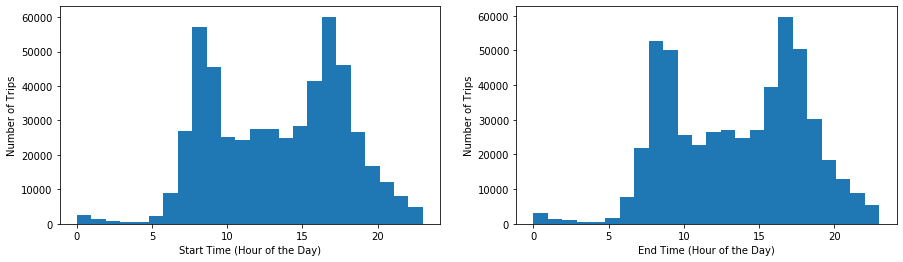

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figwidth(15)

# Start times
ax1.hist(df.start_time.dt.hour, bins=24)
ax1.set_xlabel('Start Time (Hour of the Day)')
ax1.set_ylabel('Number of Trips');

# End times
ax2.hist(df.end_time.dt.hour, bins=24)
ax2.set_xlabel('End Time (Hour of the Day)')
ax2.set_ylabel('Number of Trips');

This clearly shows that the start time grouped by hour of the day follows a bimodal distribution, and the same applies for end time. Looking at the peaks, they appear to be around 8am and again at 5pm, which are rush hour times when many people are commuting to and from work. The graph gives us an indication that many of the trips are used for commuting to a place of work.

There is a lull during the day between the two rush hour peaks, where the number of trips being made remains almost constant. These could be tourists or visitors to cities using the bikes. Additionally the lack of trips between midnight and 5am shows us that there is little demand for GoBikes at night.

It would be useful to investigate further how the start/end of time, number of or duration of trips varies by type of user, e.g. subscriber or customer.

### Start/End Stations

In [93]:
top_start_stations = df.start_station_name.value_counts().nlargest(10)
top_end_stations = df.end_station_name.value_counts().nlargest(10)

In [94]:
base_colour = sns.color_palette()[0]

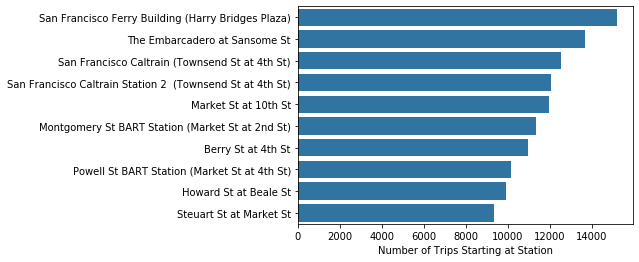

In [100]:
ax = sns.barplot(y=top_start_stations.index, x=top_start_stations.values, color=base_colour)
ax.set_xlabel('Number of Trips Starting at Station');

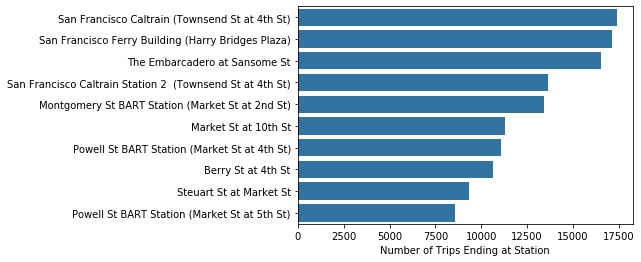

In [101]:
ax = sns.barplot(y=top_end_stations.index, x=top_end_stations.values, color=base_colour)
ax.set_xlabel('Number of Trips Ending at Station');

It looks as if the most popular start and end stations are all busy locations in San Fransisco, which is likely why those stations have the most activity.

### User Type

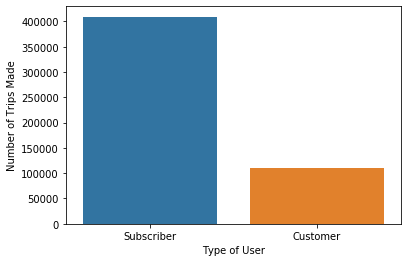

In [109]:
user_types = df.user_type.value_counts()

ax = sns.barplot(x=user_types.index, y=user_types.values);
ax.set_xlabel('Type of User')
ax.set_ylabel('Number of Trips Made');

This clearly shows us that the vast majority of trips are made by Ford GoBike subscribers, with very few trips being made by one-off customers. This is likely due to regular users becoming subscribers due to it working out cheaper for them. It would be useful to investigate the differences between subscribers and customers further, such as differences in the number of trips taken by each, and duration of those trips.

### Age (Birth Year)

In [259]:
# Calculate ages and add to dataframe
ages = 2017 - df.member_birth_year
df['age'] = ages

In [165]:
print(ages.min())
print(ages.max())

18.0
131.0


In [166]:
# Remove outliers (over 100 years old)
new_ages = [i for i in ages if i <= 100]

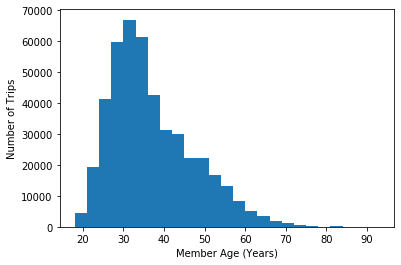

In [167]:
plt.hist(new_ages, bins=25)
plt.xlabel('Member Age (Years)')
plt.ylabel('Number of Trips');

The number of trips by age group follows a right skewed distribution, with the majority of the riders aged under 40, the most at approximately 30 years old. There are no riders under 18, indicating that only adults use the service or data has not been collected for minors. Additionally, there are relatively few journeys from those past working age (70+ years old).

I will further explore how age makes a difference to the duration of the trips, rather than just the number of trips made.

### Gender

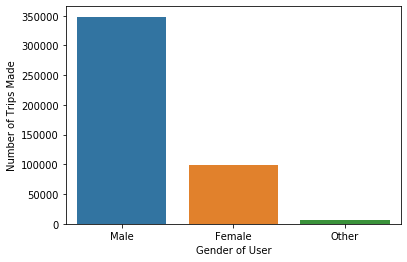

In [140]:
gender = df.member_gender.value_counts()

ax = sns.barplot(x=gender.index, y=gender.values);
ax.set_xlabel('Gender of User')
ax.set_ylabel('Number of Trips Made');

From this graph we can see that males make the most trips on the the GoBikes, with females making fewer trips and anyone classing themselves as neither making the fewest.

It would be interesting to look at how duration varies with gender, something I'll explore later.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the duration of trips was right skewed, but when plotted on a logarithmic scale, it followed a normal distribution. Additionally, the start and end times (by hour) followed a bimodal distribution, with peaks during rush hour times.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The duration field I limited to 4000 seconds to provide meaningful visualisations, as there were very few trips above this value which can be considered outliers.

The birth year I converted to the age of rider to more easily identify the trend in the number of trips made by older vs younger people. The ages of riders included at least one age of 131 years old, clearly an outlier, which I removed.

## Bivariate Exploration

### Trip Duration and User Type (Subscriber/Customer)

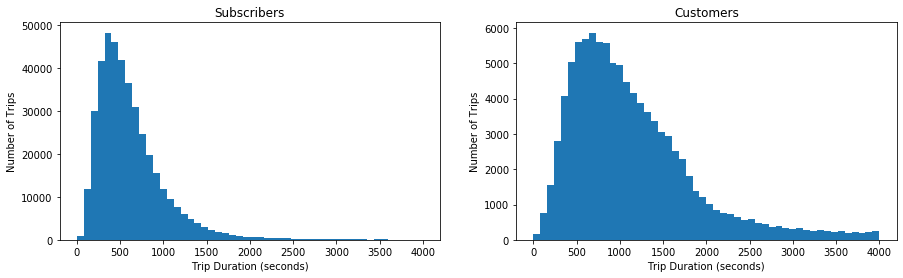

In [201]:
subscribers = df.query('user_type == "Subscriber"')
customers = df.query('user_type == "Customer"')

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figwidth(15)

ax1.hist(subscribers.duration_sec, bins=50, range=(0, 4000))
ax1.set_xlabel('Trip Duration (seconds)')
ax1.set_ylabel('Number of Trips')
ax1.set_title('Subscribers');

ax2.hist(customers.duration_sec, bins=50, range=(0, 4000))
ax2.set_xlabel('Trip Duration (seconds)')
ax2.set_ylabel('Number of Trips')
ax2.set_title('Customers');

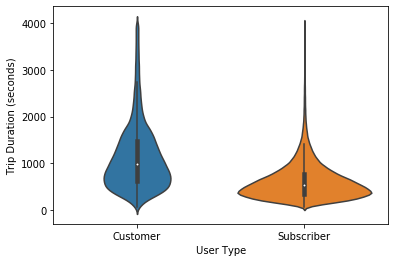

In [200]:
ax = sns.violinplot(data=df.query('duration_sec <= 4000'), x='user_type', y='duration_sec')
ax.set_xlabel('User Type')
ax.set_ylabel('Trip Duration (seconds)');

These graphs clearly show us that subscribers tend to have significantly shorter journeys than other customers. The peak at 500 seconds on the histogram and the very wide section on the violin plot show us this, with very few trips over 1000 seconds long (16m 40s). Compare this to other customers, who have a less sharply peaked distribution, they have a generally wider range of durations.

Additionally, the customers have a longer duration mean than subscribers, showing us that they tend to cycle for longer. This backs up the idea that subscribers are most likely to be commuters, whereas customers are more likely to be using the bikes for leisure purposes.

### Trip Start and End Times by User Type

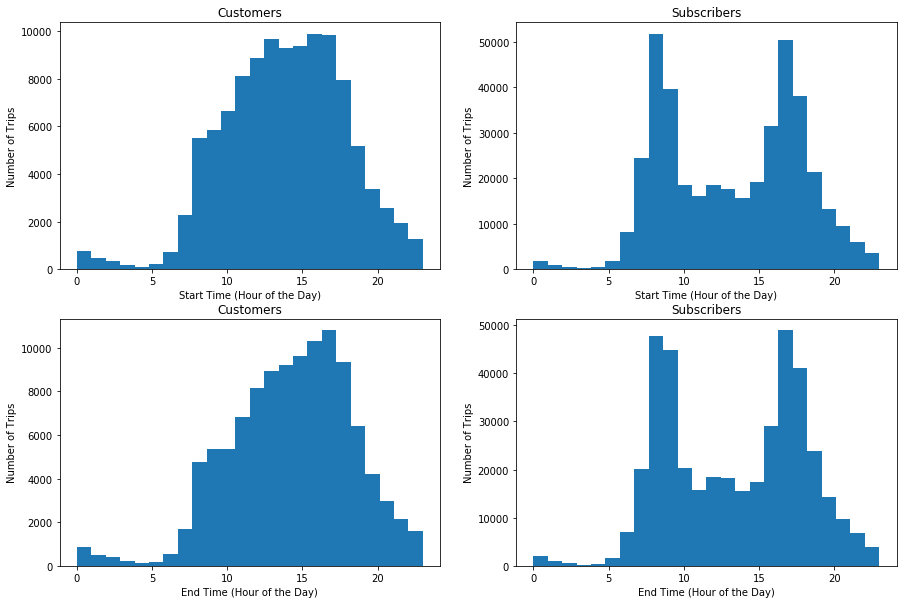

In [234]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_figwidth(15)
fig.set_figheight(10)

# Start times (customers)
ax1.hist(customers.start_time.dt.hour, bins=24)
ax1.set_xlabel('Start Time (Hour of the Day)')
ax1.set_ylabel('Number of Trips');
ax1.set_title('Customers');

# Start times (sbuscribers)
ax2.hist(subscribers.start_time.dt.hour, bins=24)
ax2.set_xlabel('Start Time (Hour of the Day)')
ax2.set_ylabel('Number of Trips');
ax2.set_title('Subscribers');

# End times (customers)
ax3.hist(customers.end_time.dt.hour, bins=24)
ax3.set_xlabel('End Time (Hour of the Day)')
ax3.set_ylabel('Number of Trips');
ax3.set_title('Customers');

# End times (sbuscribers)
ax4.hist(subscribers.end_time.dt.hour, bins=24)
ax4.set_xlabel('End Time (Hour of the Day)')
ax4.set_ylabel('Number of Trips');
ax4.set_title('Subscribers');

This shows a huge difference in the distribution of trip start and end times by user type. Subscribers follow the bimodal distribution we previously saw, with peaks during rush hour. However customers follow a normal distribution, with the most activity occurring during mid-afternoon. There does not appear to be a link with customers and rush hour, although from 8pm they follow a similar pattern to subscribers.

### Duration by Age

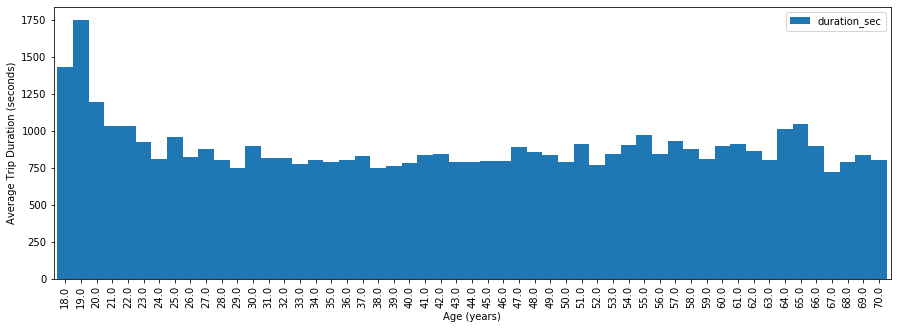

In [296]:
duration_by_age_means = df.query('age <= 70')[['duration_sec', 'age']].groupby('age').mean()
duration_by_age_means.plot.bar(width=1.0, figsize=(15,5))
plt.xlabel('Age (years)')
plt.ylabel('Average Trip Duration (seconds)');

As we saw previously, there were very few trips made from over 70s, so I excluded that data from the graph for clarity. This graph shows us that under 25s tended to have longer trip durations, however average trip durations remains almost the same for any users over 25 years old, suggesting that older people do not find any limiting physical restrictions to riding the bikes.

### Duration by Gender

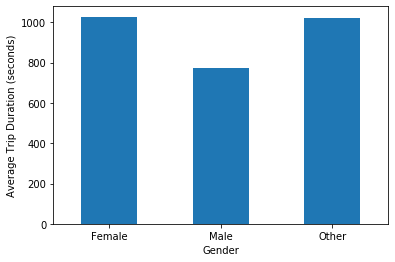

In [402]:
duration_by_gender_means = df[['duration_sec', 'member_gender']].groupby('member_gender').mean()
duration_by_gender_means.plot.bar(legend=None)
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (seconds)');

This chart shows that males have a shorter average trip duration on the GoBikes than those who identified as female or other.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The difference with the trip duration between subscribers and customers was interesting, as it clearly showed how subscribers are actually likely to make shorter duration trips than customers, most likely due to them using it to commute rather than for leisure activities.

Additionally, the start and end times of trips for subscribers are centered around rush hour, whereas for customers they are spread out relatively evenly throughout the afternoon.

Furthermore, I found that for users aged over 25, the age did not make a difference in the average duration of the trip, and I discovered that males tend to to make shorter trips than females or other genders.

## Multivariate Exploration

### Duration of Trips (Starting at Different Times), Broken Down by User Type

In [391]:
df['start_hour'] = df.start_time.dt.hour

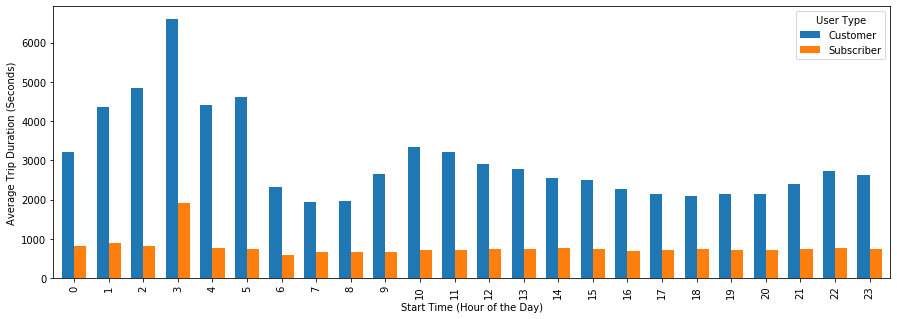

In [416]:
duration_means = df[['duration_sec', 'start_hour', 'user_type']].groupby(['start_hour', 'user_type']).mean()
duration_means.unstack().plot.bar(width=0.7, figsize=(15, 5))
plt.xlabel('Start Time (Hour of the Day)')
plt.ylabel('Average Trip Duration (Seconds)')
plt.legend(['Customer', 'Subscriber'], title='User Type');

It appears that the average duration of a trip for subscribers does not vary much by start time, however the trips made by customers show that very early morning (before 5am) trips tend to be the longest, with trips around 8am being the shortest. Additionally, it shows clearly that no matter the time of the start of the trip, customer trips tend to be longer than trips made by subscribers.

### Number of Trips Over Time, Broken Down by Gender

In [403]:
df['start_month'] = df.start_time.dt.month

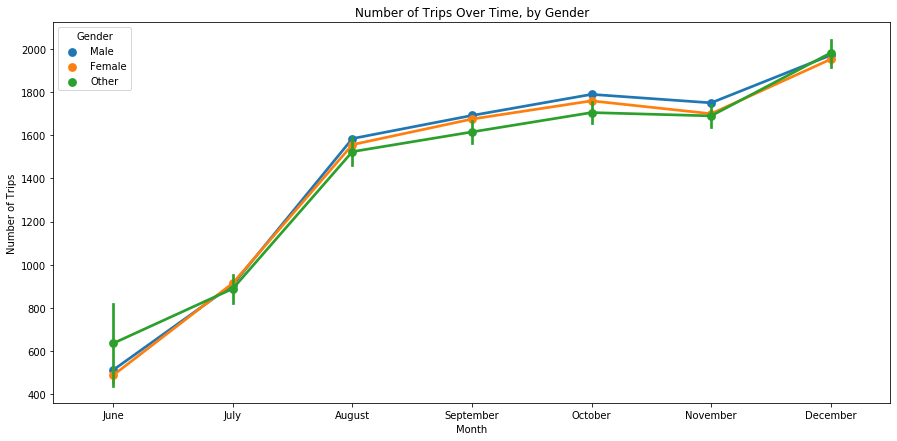

In [426]:
plt.figure(figsize = (15, 7))
sb.pointplot(data=df, x='start_month', y='bike_id', hue='member_gender')
plt.title('Number of Trips Over Time, by Gender')
plt.legend(title='Gender')
plt.xlabel('Month')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.ylabel('Number of Trips');

We can see here that the overall number of trips kept increasing every month (other than November) for the whole duration of the dataset. This could be due to it being a new scheme/initiative and GoBike becoming more popular or adding new available bikes. Additionally, the correlation between the how the number of trips changed between the genders is very strong, they all increased relatively evenly.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There was a clear relationship between start time and the duration of trips for customers, with very early morning trips lasting the longest, and 8am trips being the shortest. This is likely due to the trips being made at 8am (during rush hour) being commutes, even though the customers are not subscribers, they could still use the service on a one-off basis or little enough that it is not worth subscribing.

Additionally, the number of trips made by gender and how this changed over time actually remained almost the same between the genders.

### Were there any interesting or surprising interactions between features?

The start time of journeys actually had very little impact on the trip duration of subscribers.